# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | dimako
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | fort bragg
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | tazovsky
Processing Record 15 of Set 1 | kijang
Processing Record 16 of Set 1 | umluj
Processing Record 17 of Set 1 | mejit
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | san pedro
Processing Record 22 of Set 1 | brisas de zicatela
Processing

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,293.03,81,35,1.47,ZA,1710824455
1,hamilton,39.1834,-84.5333,273.95,61,100,5.66,US,1710824202
2,lebu,-37.6167,-73.6500,286.52,81,100,3.40,CL,1710824455
3,dimako,4.3833,13.5667,294.86,94,100,0.93,CM,1710824456
4,petropavlovsk-kamchatsky,53.0452,158.6483,273.48,86,40,22.35,RU,1710824456


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,293.03,81,35,1.47,ZA,1710824455
1,hamilton,39.1834,-84.5333,273.95,61,100,5.66,US,1710824202
2,lebu,-37.6167,-73.6500,286.52,81,100,3.40,CL,1710824455
3,dimako,4.3833,13.5667,294.86,94,100,0.93,CM,1710824456
4,petropavlovsk-kamchatsky,53.0452,158.6483,273.48,86,40,22.35,RU,1710824456


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

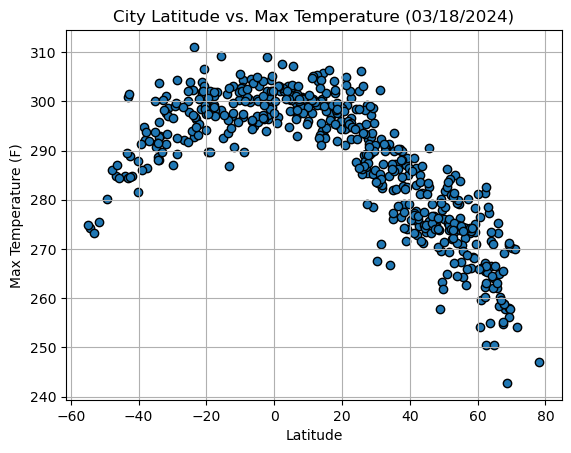

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/18/2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

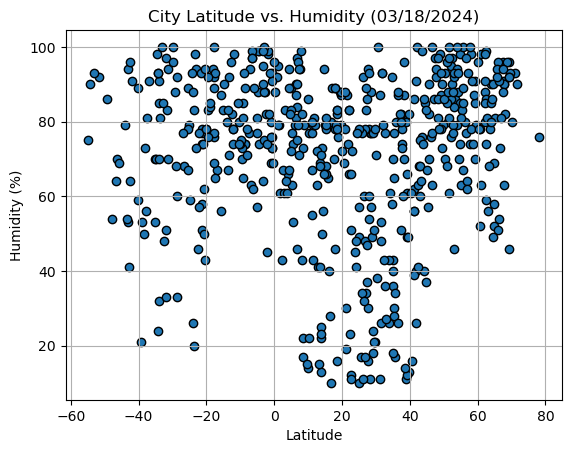

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/18/2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

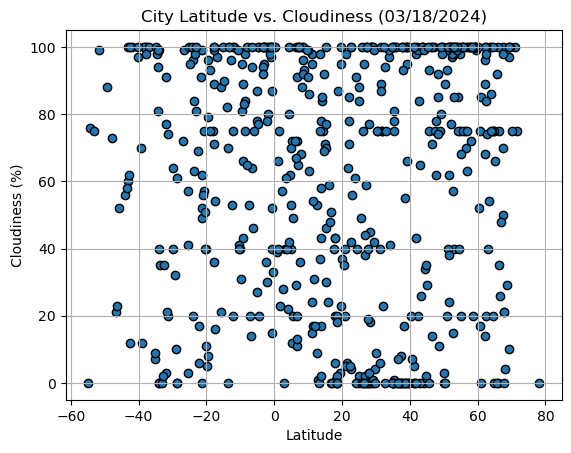

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/18/2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

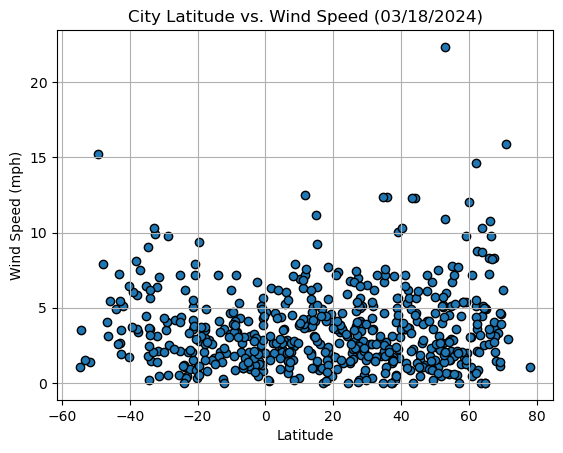

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/18/2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [70]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hamilton,39.1834,-84.5333,273.95,61,100,5.66,US,1710824202
3,dimako,4.3833,13.5667,294.86,94,100,0.93,CM,1710824456
4,petropavlovsk-kamchatsky,53.0452,158.6483,273.48,86,40,22.35,RU,1710824456
6,bethel,41.3712,-73.4140,275.79,62,5,1.34,US,1710824234
9,ribeira grande,38.5167,-28.7000,287.47,81,55,4.02,PT,1710824457


In [71]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,293.03,81,35,1.47,ZA,1710824455
2,lebu,-37.6167,-73.6500,286.52,81,100,3.40,CL,1710824455
5,grytviken,-54.2811,-36.5092,274.32,90,76,3.54,GS,1710824456
7,hithadhoo,-0.6000,73.0833,301.85,73,15,4.34,MV,1710824457
8,port-aux-francais,-49.3500,70.2167,280.13,86,88,15.25,TF,1710824457


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.815962515405454


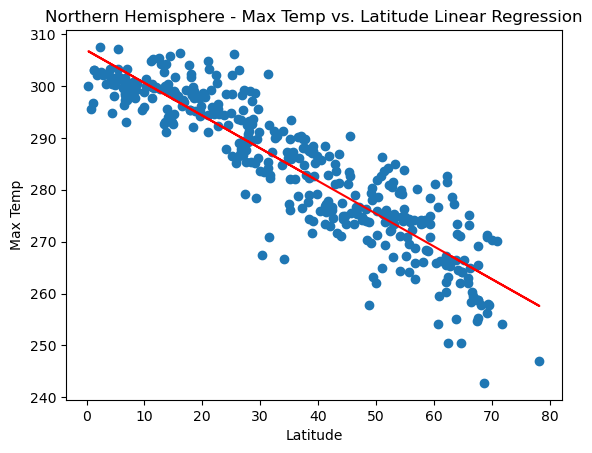

In [72]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", (0,0))

The r-squared is: 0.4320536657829321


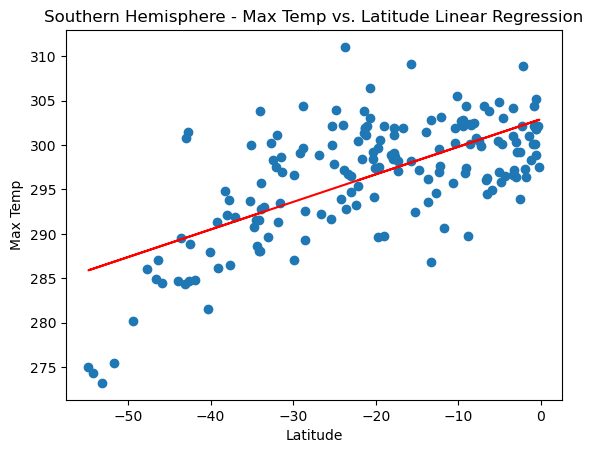

In [73]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", (-30,40))

**Discussion about the linear relationship:** 

Northern Hemisphere: Strong negative correlation, temperature decreases as latitude increases.
Southern Hemisphere: Weak positive correlation, temperature tends to increase with latitude but less pronounced.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07298347072479794


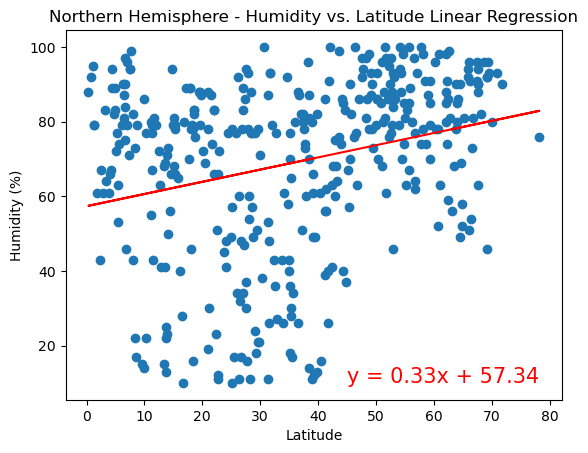

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", (45, 10))

The r-squared is: 0.04926756873850604


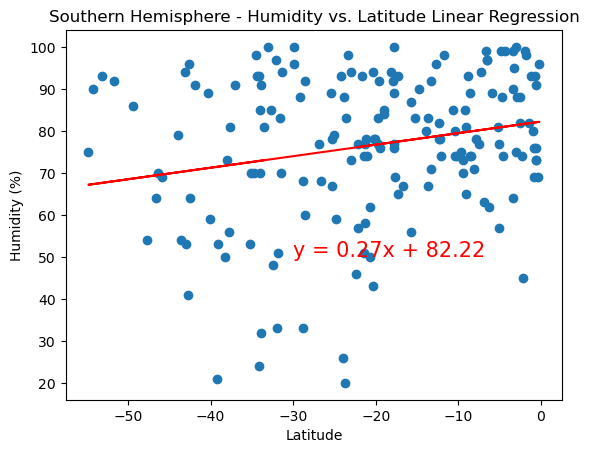

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", (-30, 50))

**Discussion about the linear relationship:** 

Weak positive correlation between latitude and humidity in both hemispheres.
Other local factors, such as climate and weather patterns, have a more significant influence on humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.028971041579425913


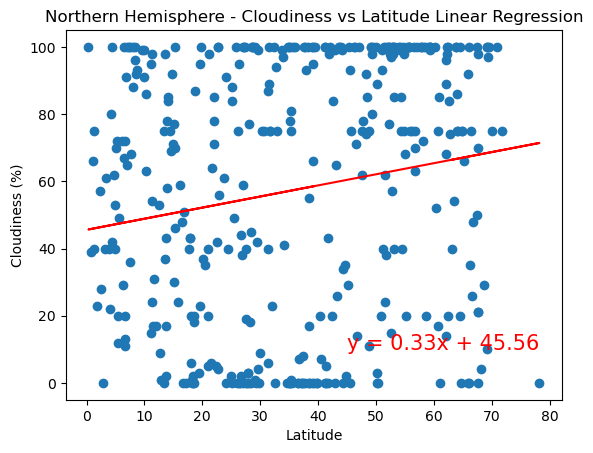

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs Latitude Linear Regression", (45, 10))

The r-squared is: 0.029652199439690045


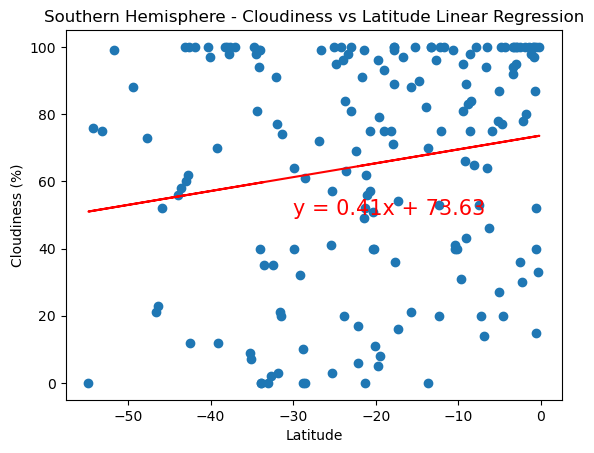

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs Latitude Linear Regression", (-30, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.011954437627366445


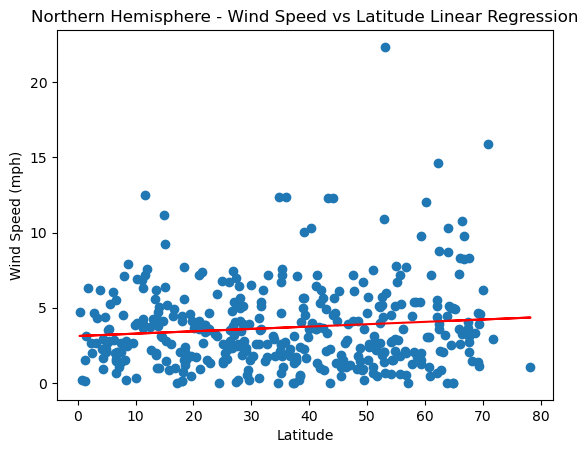

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs Latitude Linear Regression", (0, 25))

The r-squared is: 0.07986607183392624


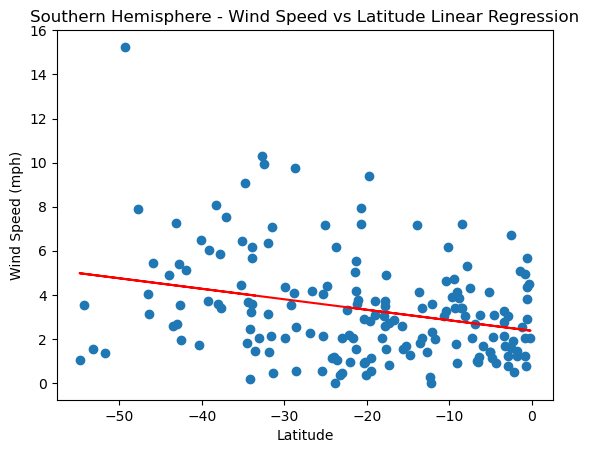

In [80]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs Latitude Linear Regression", (-30, 25))

**Discussion about the linear relationship:** 

Weak linear relationships between latitude and wind speed in both hemispheres.
Trends suggest increasing wind speed in the Northern Hemisphere and decreasing wind speed in the Southern Hemisphere away from the equator, but correlations are not strong or conclusional. 